In [24]:
from pathlib import Path
import matplotlib.pyplot as plt

import numpy as np 
import pickle

In [25]:
root = Path("./results")
filsMNAR = list(root.glob("./Logi_p50/MNARRes/MNAR_logi_*.pkl"))
filsMAR = list(root.glob("./Logi_p50/MARRes/MAR_logi_*.pkl"))
filsEM = list(root.glob("./Logi_p50/EMRes/EM_logi_*.pkl"))
#fils = sorted(fils, key=name2mn)

In [26]:
def path2m(fil):
    m = int(fil.stem.split("m")[1].split("_")[0])
    return m

In [27]:
filsMNAR = sorted(filsMNAR, key=path2m)
filsMAR = sorted(filsMAR, key=path2m)
filsEM = sorted(filsEM, key=path2m)

some parameters 

In [28]:
from collections import defaultdict as ddict

errTsMNAR = ddict(list)
errBsMNAR = ddict(list)
for curFil in filsMNAR:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsMNAR[m].append(errT)
    errBsMNAR[m].append(errb)

In [29]:
errTsMAR = ddict(list)
errBsMAR = ddict(list)
for curFil in filsMAR:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsMAR[m].append(errT)
    errBsMAR[m].append(errb)

In [30]:
errTsEM = ddict(list)
errBsEM = ddict(list)
for curFil in filsEM:
    m = path2m(curFil)
    with open(curFil, "rb") as f:
         res = pickle.load(f)
    errb = res[1]["errb"]
    errT = res[1]["errT"]
    
    errTsEM[m].append(errT)
    errBsEM[m].append(errb)

In [31]:
ms = [100, 200, 400, 800, 1600]
errBs = ddict(list)
errTs = ddict(list)
for m in ms:
    errBs["MNAR"].append(np.mean(errBsMNAR[m]))
    errBs["MAR"].append(np.mean(errBsMAR[m]))
    errBs["EM"].append(np.mean(errBsEM[m]))
    
    errTs["MNAR"].append(np.mean(errTsMNAR[m]))
    errTs["MAR"].append(np.mean(errTsMAR[m]))
    errTs["EM"].append(np.mean(errTsEM[m]))

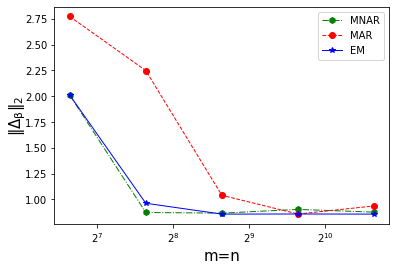

In [32]:
font_y = {"size": 15, "va":"baseline"}
font_x = {"size": 15}
# plt.ylim([0, 3.8])
plt.xlabel("m=n", font_x)
plt.ylabel(r"$\Vert\Delta_{\mathrm{\beta}}\Vert_2$", font_y)
plt.xscale("log", base=2)
plt.plot(ms, errBs["MNAR"][:], "g-.h", label="MNAR", linewidth=1)
plt.plot(ms[:], errBs["MAR"][:], "r--o", label="MAR", linewidth=1)
plt.plot(ms[:], errBs["EM"][:], "b-*", label="EM", linewidth=1)
plt.legend(loc=1)

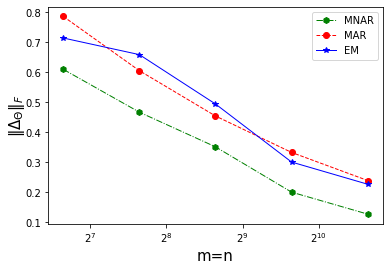

In [33]:
plt.xlabel("m=n", font_x)
# plt.ylim([0, 1]) #for p=200 linear
plt.ylabel(r"$\Vert\Delta_{\mathrm{\Theta}}\Vert_F$", font_y)
plt.plot(ms, errTs["MNAR"], "g-.h", label="MNAR", linewidth=1)
plt.plot(ms, errTs["MAR"], "r--o", label="MAR", linewidth=1)
plt.plot(ms, errTs["EM"], "b-*", label="EM", linewidth=1)
plt.xscale("log", base=2)
plt.legend(loc=1)

In [39]:
errBs["MNAR"]

[2.01128246157075,
 0.8738747284723035,
 0.8676808135565238,
 0.903559304297827,
 0.8774101665088967]

In [40]:
errTs["MNAR"]

[0.6098070617924136,
 0.46660722219458933,
 0.35083453110984414,
 0.19937846867612358,
 0.12594923593434676]

In [155]:
print(filsEM[10])
with open(filsEM[10], "rb") as f:
         res = pickle.load(f)

results/Logi_p50/EMRes/EM_logi_p50_m100_simu17_iter1000.pkl


In [156]:
ebeta = res[1]["betahat"]
etheta = res[1]["bThetahat"]
beta = res[1]["beta0"]
theta = res[1]["bTheta0"]
X = res[1]["X"]
Y = res[1]["Y"]
R = res[1]["R"]
R = R.astype(np.bool)
# Y = Y.astype(np.int)


In [159]:
Y[R==1]

array([1.        , 1.        , 0.99989267, ..., 0.99988155, 1.        ,
       0.49905789])

In [151]:
bXT = np.matmul(X, ebeta) + etheta
probs = np.exp(bXT)/(1+np.exp(bXT))

In [152]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [153]:
Ymiss = Y[R==0]
predMiss = probs[R==0]
roc_auc_score(Ymiss, predMiss)

0.8218515678254941

In [154]:
(R==0).mean()

0.3174

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(Ymiss, predMiss)

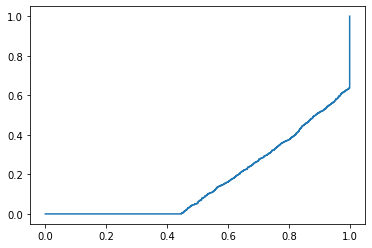

In [143]:
plt.plot(tpr, fpr)